<a href="https://colab.research.google.com/github/Yasirkhan26/CS-351L---AI-Lab-GitHub-Repository_2022455/blob/main/M_Yasir_CS351L_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**University Exam Scheduling Problem**

This program schedules exams in such a way that no two exams that share common students are scheduled at the same time.
Nodes represent exams, and edges represent conflicts (shared students).

Heuristic Choice:
- Sequential Assignment is used in this implementation.
- The algorithm assigns the first available color to each exam sequentially, ensuring that no two adjacent (conflicting) exams have the same color.

The code uses a backtracking algorithm to assign colors to nodes in a way that ensures no two adjacent nodes (conflicting exams) share the same color.
It visualizes the graph at each step, allowing for clear monitoring of how the algorithm assigns colors and handles conflicts.
The output provides a final list of color assignments for the exams, indicating which exams can be scheduled simultaneously without conflicts.
Notes
To ensure that neighboring nodes do not share the same color, the is_safe function plays a crucial role in validating color assignments.
The number of colors can be adjusted depending on the complexity of the exam scheduling problem. In this example, a maximum of 5 colors is used, but you can increase this value if needed to fit your specific use case.

Starting graph coloring...
Assigning color Red to Exam 0


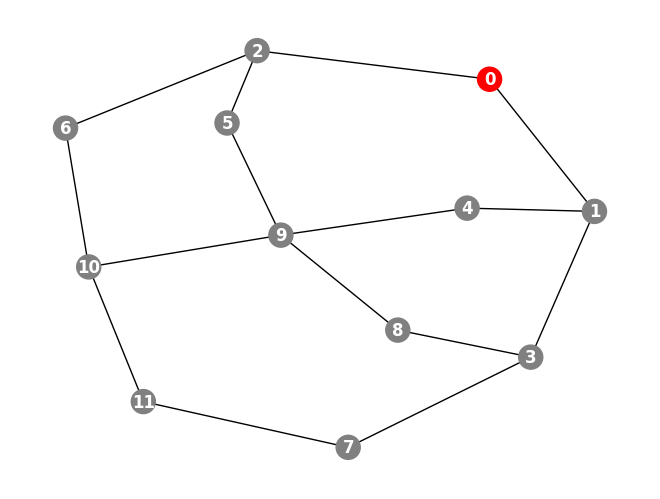

Assigning color Green to Exam 1


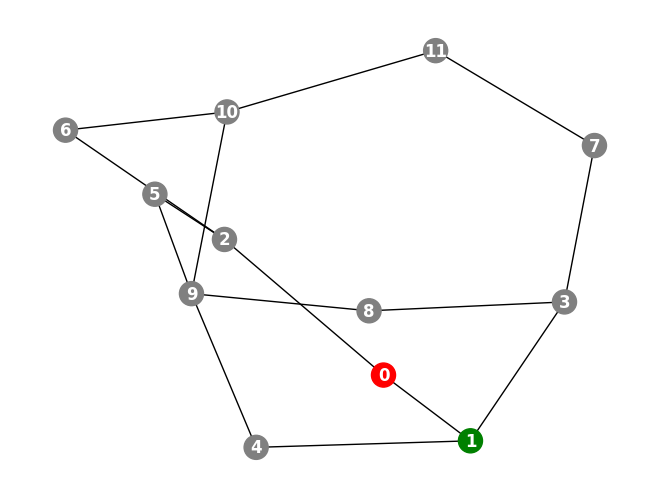

Assigning color Green to Exam 2


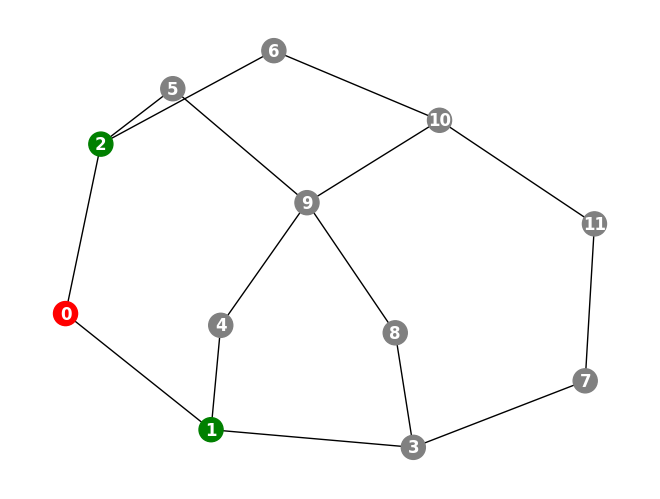

Assigning color Red to Exam 3


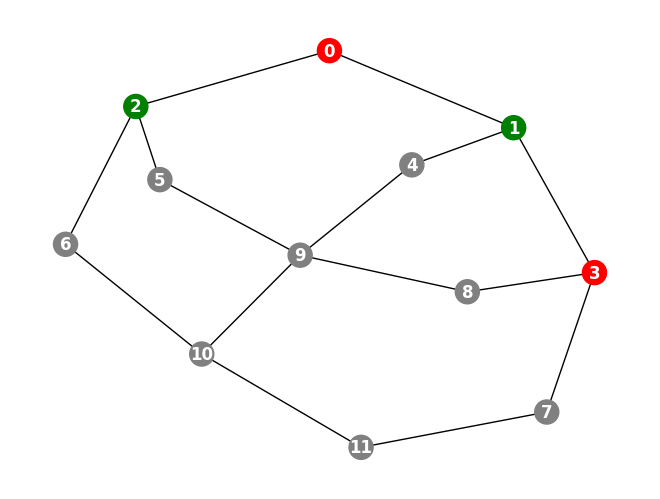

Assigning color Red to Exam 4


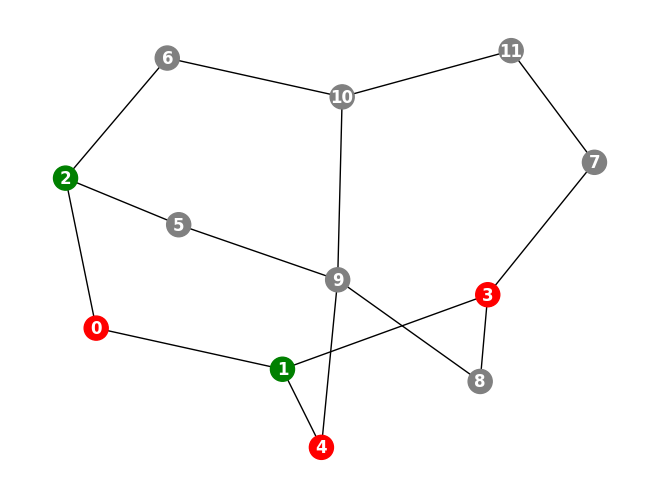

Assigning color Red to Exam 5


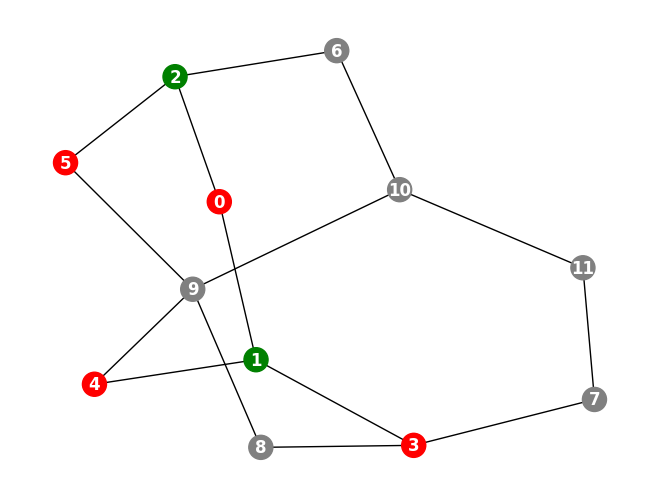

Assigning color Red to Exam 6


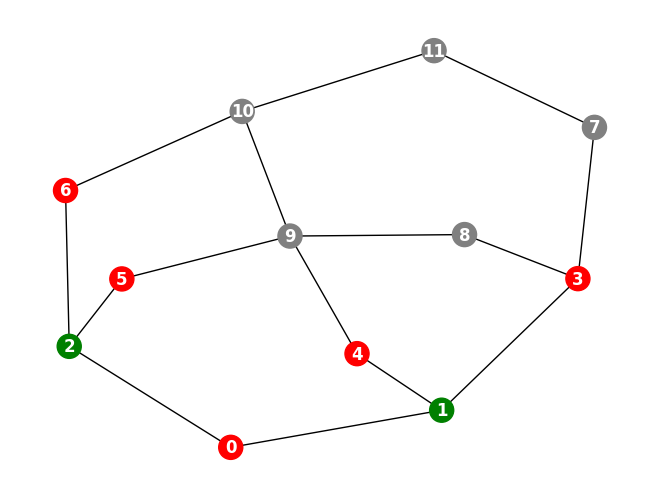

Assigning color Green to Exam 7


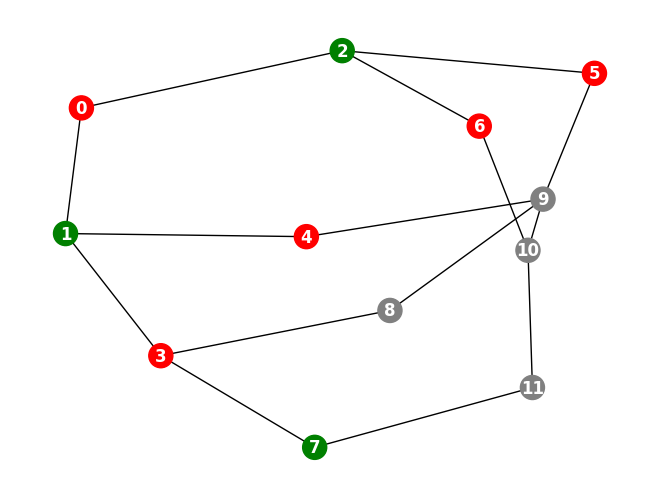

Assigning color Green to Exam 8


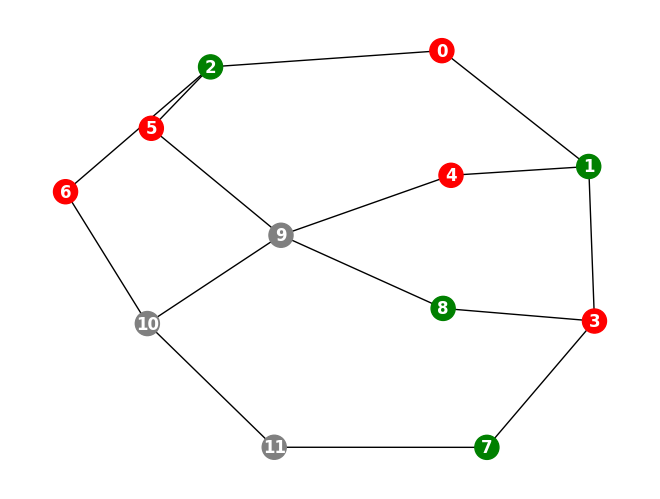

Assigning color Yellow to Exam 9


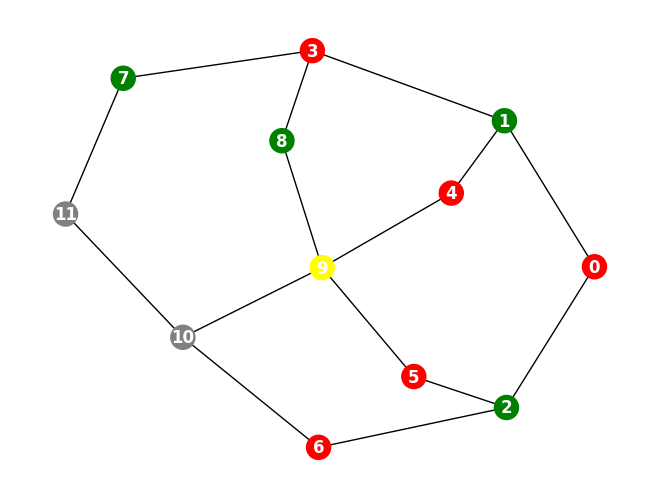

Assigning color Green to Exam 10


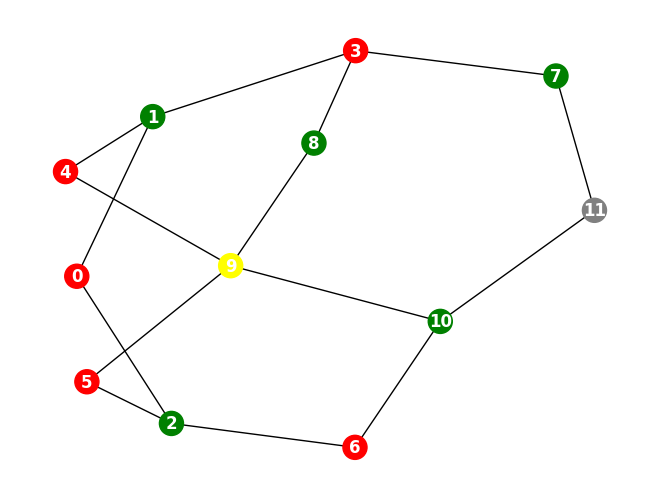

Assigning color Red to Exam 11


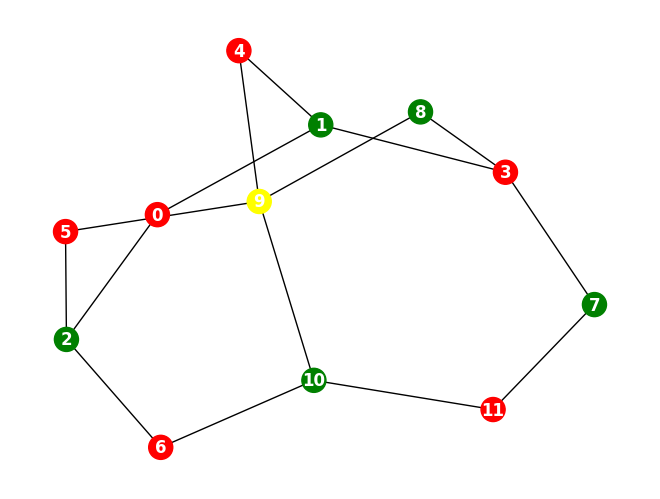

Final color assignments: [('Exam 0', 'Red'), ('Exam 1', 'Green'), ('Exam 2', 'Green'), ('Exam 3', 'Red'), ('Exam 4', 'Red'), ('Exam 5', 'Red'), ('Exam 6', 'Red'), ('Exam 7', 'Green'), ('Exam 8', 'Green'), ('Exam 9', 'Yellow'), ('Exam 10', 'Green'), ('Exam 11', 'Red')]


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph coloring for university exam scheduling




# Function to check if the current color assignment is safe
def is_safe(graph, node, color, colors):
    for neighbor in graph.neighbors(node):
        if colors[neighbor] == color:
            # Conflict detected: neighboring node has the same color
            return False
    return True

# Recursive function to solve the graph coloring problem
def graph_coloring_util(graph, m, colors, node):
    if node == len(graph):  # All nodes (exams) are colored
        return True

    # Try different colors for node
    for color in range(m):
        if is_safe(graph, node, color, colors):
            # Assign the color to the node
            colors[node] = color
            print(f"Assigning color {color_names[color]} to Exam {node}")
            visualize_graph(graph, colors)  # Visualize each step

            # Recur to assign colors to the rest of the nodes
            if graph_coloring_util(graph, m, colors, node + 1):
                return True

            # If assigning color doesn't lead to a solution, backtrack
            colors[node] = -1
            print(f"Backtracking: Removing color from Exam {node}")

    # If no color can be assigned to this node, return False
    return False

# Main graph coloring function
def graph_coloring(graph, m):
    colors = [-1] * len(graph)  # Initialize all nodes with no color (-1)

    if not graph_coloring_util(graph, m, colors, 0):
        print("No solution found")
        return None  # No solution found
    return colors

# Visualization function using basic colors
color_names = ["Red", "Green", "Yellow", "Blue", "Purple"]  # Expanded color palette

def visualize_graph(graph, colors):
    color_map = [color_names[color] if color != -1 else 'gray' for color in colors]
    plt.figure()
    nx.draw(graph, with_labels=True, node_color=color_map, font_weight='bold', font_color='white')
    plt.show()

# Create a larger graph for exams with 12 nodes and more conflicts
def create_exam_graph():
    graph = nx.Graph()
    # Adding edges to represent shared students (exam conflicts)
    # Nodes represent exams (0 to 11), and edges represent conflicts between exams.
    graph.add_edges_from([
        (0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8),
        (4, 9), (5, 9), (6, 10), (7, 11), (8, 9), (9, 10), (10, 11)
    ])
    return graph

# Example execution
if __name__ == "__main__":
    exam_graph = create_exam_graph()
    m = 5  # Number of time slots (colors) needed

    print("Starting graph coloring...")
    colors = graph_coloring(exam_graph, m)

    if colors:
        print(f"Final color assignments: {[(f'Exam {i}', color_names[color]) for i, color in enumerate(colors)]}")
    else:
        print("No valid coloring solution found.")
